Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Ignore TensorFlow info messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

Load MNIST Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

# --- Normalize data ---
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Keep images as 28x28x1 for CNN / demo.ipynb compatibility
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)


Build Model

In [4]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Compile Model

In [5]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Train Model

In [6]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.8718 - loss: 0.4278 - val_accuracy: 0.9757 - val_loss: 0.0754
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - accuracy: 0.9814 - loss: 0.0604 - val_accuracy: 0.9828 - val_loss: 0.0539
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.9873 - loss: 0.0394 - val_accuracy: 0.9872 - val_loss: 0.0425
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 64ms/step - accuracy: 0.9908 - loss: 0.0293 - val_accuracy: 0.9877 - val_loss: 0.0470
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.9941 - loss: 0.0181 - val_accuracy: 0.9888 - val_loss: 0.0390


Evaluate on Test Set

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9856 - loss: 0.0439
Test Accuracy: 0.9887


Visualize Test Predictions

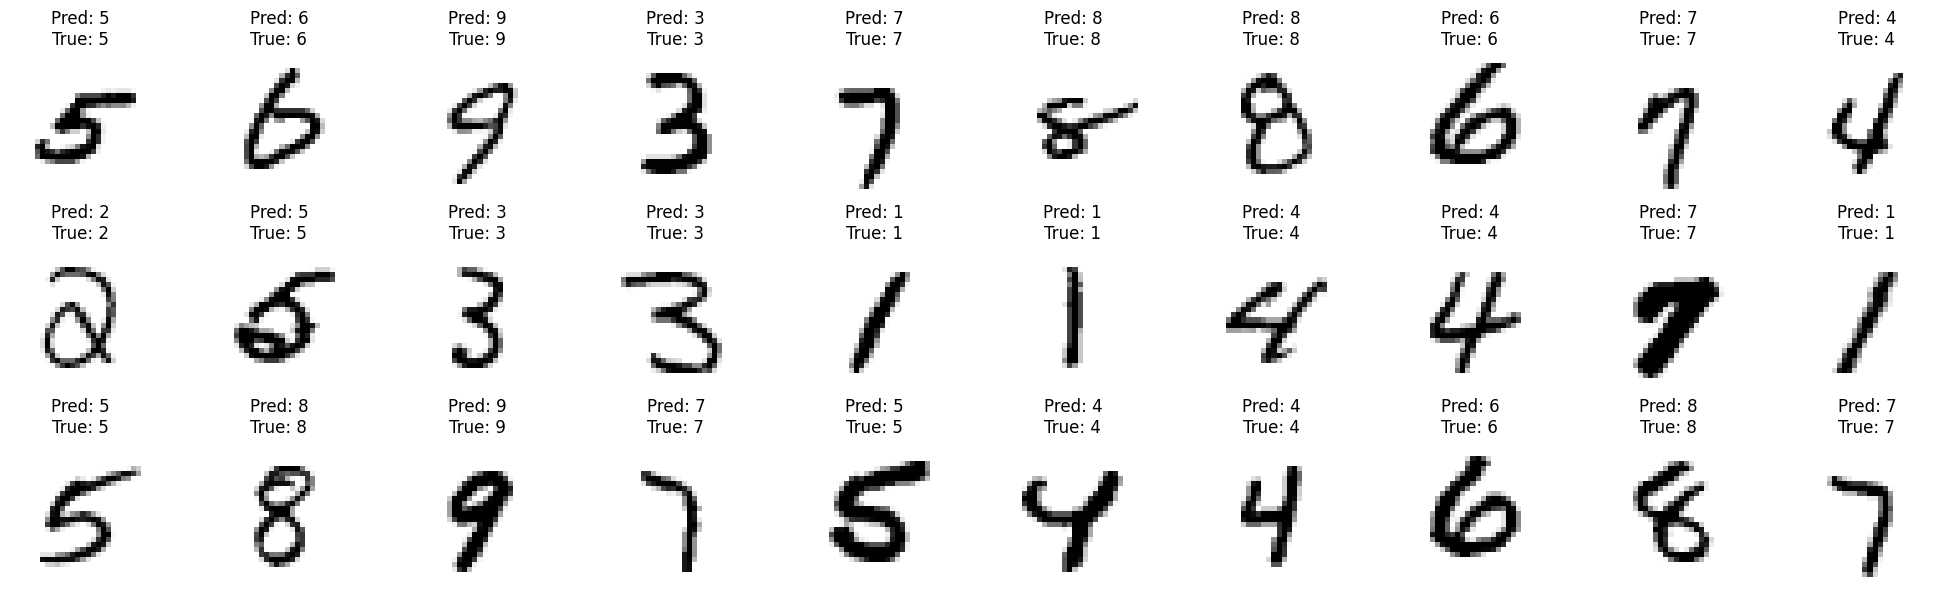

In [8]:
rows, cols = 3, 10
plt.figure(figsize=(20,6))
for i in range(rows*cols):
    idx = random.randint(0, x_test.shape[0]-1)
    img = x_test[idx].reshape(28,28)
    pred = np.argmax(model.predict(x_test[idx:idx+1], verbose=0))
    plt.subplot(rows, cols, i+1)
    plt.imshow(img, cmap='gray_r')
    plt.title(f"Pred: {pred}\nTrue: {y_test[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Test Individual Image

In [9]:
def test_single(idx):
    img = x_test[idx]
    plt.figure()
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(f"True label: {y_test[idx]}", color='g')

    preds = model.predict(img.reshape(1,28,28,1), verbose=0)
    pred_class = np.argmax(preds)
    confidence = float(np.max(preds))
    color = 'b' if pred_class == y_test[idx] else 'r'
    plt.xlabel(f"Prediction = {pred_class} (Confidence = {confidence:.2f})", color=color)
    plt.show()

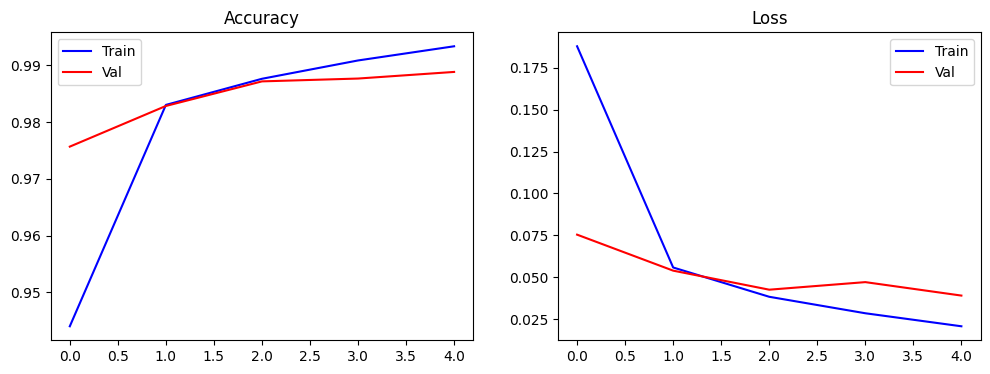

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],'b-',label='Train')
plt.plot(history.history['val_accuracy'],'r-',label='Val')
plt.title("Accuracy"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],'b-',label='Train')
plt.plot(history.history['val_loss'],'r-',label='Val')
plt.title("Loss"); plt.legend()
plt.show()

Test Accuracy: 0.9889, Loss: 0.0328
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


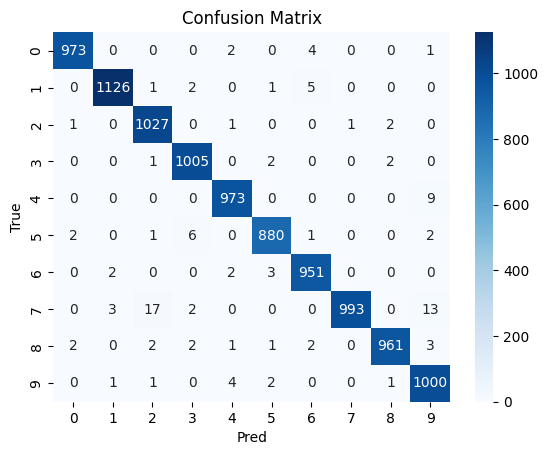

In [11]:

best_model = keras.models.load_model('mnist_model.keras')
loss, acc = best_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}, Loss: {loss:.4f}")

# Confusion matrix
y_pred = np.argmax(best_model.predict(x_test),axis=1)
# The true labels are already in the correct format (not one-hot encoded)
y_true = y_test
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix"); plt.xlabel("Pred"); plt.ylabel("True")
plt.show()

Run Test On Specific Indices

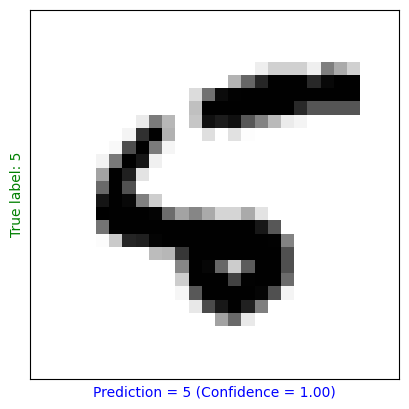

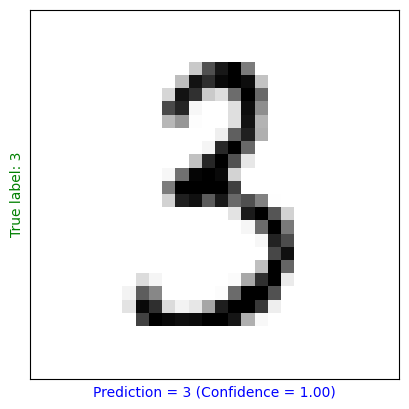

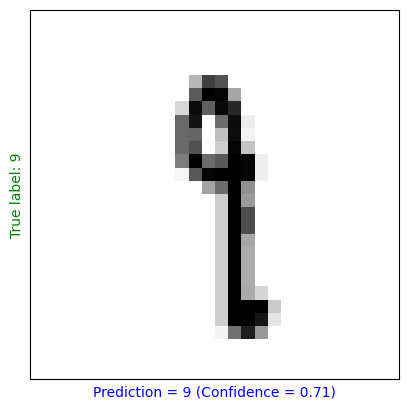

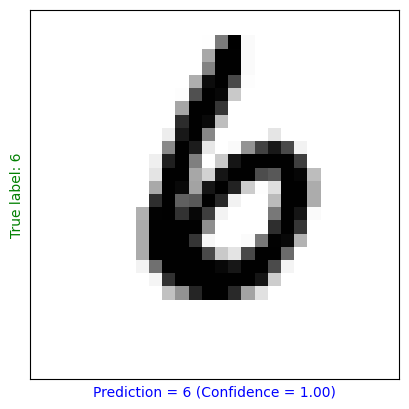

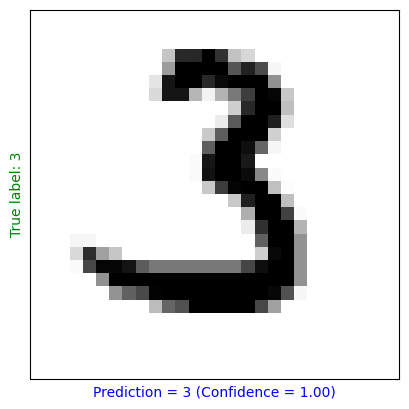

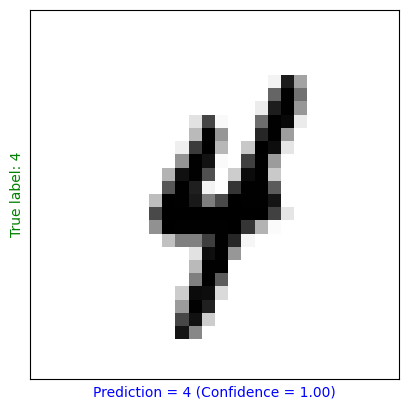

In [12]:

for idx in [8, 76, 4500, 2156, 9156, 6999]:
    test_single(idx)

Save Model

In [13]:
model.save('mnist_model.keras')
print("Model saved as mnist_model.keras")

Model saved as mnist_model.keras
